# Praca domowa 8
## Mikołaj Spytek

W tej pracy domowej postanowiłem poprawić wykres umieszczony na Twitterze kancelarii premiera w dniu 4.12.2020. Oryginalny tweet dostępny jest pod [linkiem](https://twitter.com/PremierRP/status/1334825996957196289/photo/1). Sama wizualizacja przedstawia się tak:
![Oryginalna wizualizacja](oryg.jpg)


Sam wykres wygląda estetycznie, głównie za sprawą motywu kancelarii premiera, ale do pewnych drobiazgów można się przyczepić. Oczywiście za pomocą matplotliba, czy seaborna nie odtworzę podobnego schematu graficznego, ale skupię się na poprawkach merytorycznych.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
d  = {"panstwa": ["POLSKA", "CYPR", "SŁOWENIA", "LITWA","WĘGRY", "ŁOTWA", "SŁOWACJA", "CZECHY", "RUMUNIA", "BELGIA", "SZWECJA", "FINLANDIA", "AUSTRIA", "ESTONIA", "GRECJA", "DANIA", "CHORWACJA", "PORTUGALIA", "BUŁGARIA", "MALTA", "HISZPANIA", "WŁOCHY", "FRANCJA", "HOLANDIA", "LUKSEMBURG", "NIEMCY"],
"wartosci":  [24.9, 21.3 ,20.6, 20.4, 17.2, 16.6, 13.2, 10.7, 10.3, 9.6, 9.2, 7.7, 7.7, 7.0, 6.8, 6.2, 5.7, 3.8, 3.3,1.8, 1.3, -0.8, -2.5, -2.9, -6.1, -8.9]
}
data = pd.DataFrame(d)

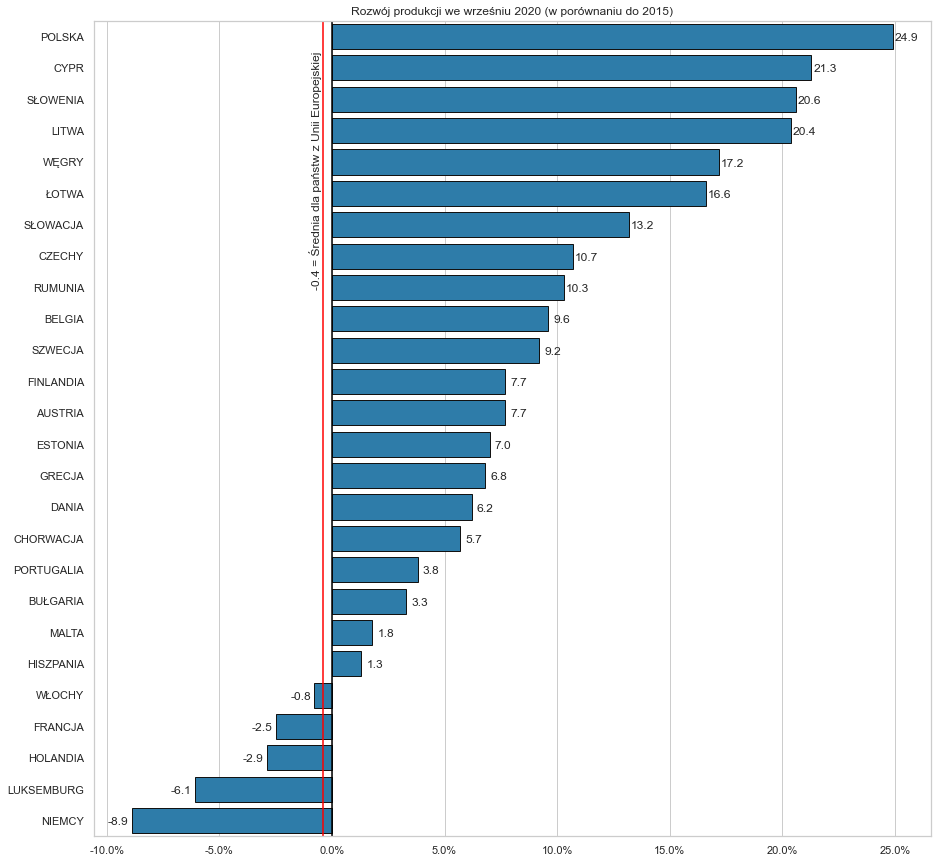

In [3]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,15))
pale = sns.color_palette(["#1a81bd"])
#plt.grid(axis="x")
ax = sns.barplot(x = data["wartosci"], y = data["panstwa"], palette=pale, edgecolor="#121212")
ax.set_title("Rozwój produkcji we wrześniu 2020 (w porównaniu do 2015)")

vals = ax.get_xticks()
ax.set_xticklabels([ str(x) + "%"  for x in vals])

ax.set_xlabel("")
ax.set_ylabel("")

for p in ax.patches:
    width = p.get_width()
    if width < 0:
        x = -0.6
    else:
        x = 0.6

    plt.text(x + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.1f}'.format(width),
             ha='center', va='center')


ax.axvline(0, color="black")
ax.axvline(-0.4, color="red")

ax.annotate("-0.4 = Średnia dla państw z Unii Europejskiej",(-1, 8), rotation="vertical")
plt.show()

## Co się zmieniło

- Na oryginalnej wizualizacji przede wszystkim, aby odczytać jakiego kraju dotyczy dany słupek trzeba było wykręcać głowę, co na pewno nie jest wygodne. Zamieniłem więc rolami OX z OY. Dzięki temu napisy są poziomo.
- Słupki na oryginalnym wykresie były "półprzezroczyste" i przebijała się przez nie siatka z tła. Sprawiało to wrażenie, że te słupki są "prążkowane", albo dzielone na jakieś podkategorie, które nie są nigdzie opisane.
- Usunąłem słupek który demonstrował średnią w Unii Europejskiej i zamieniłem go na linię na wykresie. Wprowadzenie słupka innej kategorii (porównanie pojedyncze państwo - 27 państw) jest mylące. Swoją drogą dlaczego, skoro znaczna większość tego wykresu znajduje się w części dodatniej, czemu średnia jest ujemna? Czy te pięć państw, produkuje aż tyle mniej, aby zaniżyć średnią? (Pewnie trzeba zajrzeć do danych, lecz nie był podany link bezpośredni)
- Usunąłem wyróżnienie słupka oznaczonego Polska. Na oryginalnej wizulaizacji pachnie to propagandą. Oprócz koloru zmieniona jest też czcionka. Mój poprawiony wykres jest bardziej neutralny. Każdy może odczytać z niego to, co go interesuje.
- Etykiety danych zostały. Uważam, że nie zaburzają zbyt przekazu, a jeżeli ktoś chce odczytać dokładne wartości jest to możliwe.

